In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline


In [35]:
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
airlines_passengers['Month'] = pd.to_datetime(airlines_passengers['Month'])
airlines_passengers.set_index('Month', inplace=True)

In [36]:
airlines_passengers['diff'] = airlines_passengers['Count'].diff().dropna()
airlines_passengers['log'] = np.log(airlines_passengers['Count'])
airlines_passengers['log_diff'] = airlines_passengers['log'].diff().dropna()

In [37]:
non_stationary = airlines_passengers['Count']
stationary = airlines_passengers['log_diff']

In [61]:
def MA(data, window):
    """Скользящее среднее"""
    return data.rolling(window=window).mean()

def EMA(data, span):
    """Экспоненциальное сглаживание"""
    return data.ewm(span=span).mean()

def DEMA(data, span):
    """Двойное экспоненциальное сглаживание"""
    ema = EMA(data, span)
    dema = 2 * ema - EMA(ema, span)
    return dema

def TEMA(data, span):
    """Тройное экспоненциальное сглаживание"""
    ema = EMA(data, span)
    tema = 3 * ema - 3 * EMA(ema, span) + EMA(EMA(ema, span), span)
    return tema

In [67]:
def rmse(y_true, y_pred):
    idx = y_true.index.intersection(y_pred.index)
    y_true = y_true[idx].values  # Здесь была ошибка
    y_pred = y_pred[idx].values  # И здесь тоже
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [58]:
# Параметры для тестирования
ma_windows = [6, 12, 24]
ema_spans = [5, 10, 15]

In [83]:
best_model_stationary = {'model': '', 'rmse': float('inf'), 'prediction': None}
best_model_non_stationary = {'model': '', 'rmse': float('inf'), 'prediction': None}

In [88]:
# Анализ стационарного ряда
for window in ma_windows:
    prediction = MA(stationary[:-12], window).shift(-12).dropna()
    error = rmse(stationary[-len(prediction):], prediction)
    print(f"MA({window}): RMSE = {error:.2f}")  # Вывод текущего RMSE
    if error < best_model_stationary['rmse']:
        best_model_stationary.update({'model': f"MA({window})", 'rmse': error, 'prediction': prediction})

for span in ema_spans:
    prediction_ema = EMA(stationary[:-12], span).shift(-12).dropna()
    error_ema = rmse(stationary[-len(prediction_ema):], prediction_ema)
    print(f"EMA({span}): RMSE = {error_ema:.2f}")  # Вывод текущего RMSE
    if error_ema < best_model_stationary['rmse']:
        best_model_stationary.update({'model': f"EMA({span})", 'rmse': error_ema, 'prediction': prediction_ema})

    prediction_dema = DEMA(stationary[:-12], span).shift(-12).dropna()
    error_dema = rmse(stationary[-len(prediction_dema):], prediction_dema)
    print(f"DEMA({span}): RMSE = {error_dema:.2f}")  # Вывод текущего RMSE
    if error_dema < best_model_stationary['rmse']:
        best_model_stationary.update({'model': f"DEMA({span})", 'rmse': error_dema, 'prediction': prediction_dema})

    prediction_tema = TEMA(stationary[:-12], span).shift(-12).dropna()
    error_tema = rmse(stationary[-len(prediction_tema):], prediction_tema)
    print(f"TEMA({span}): RMSE = {error_tema:.2f}")  # Вывод текущего RMSE
    if error_tema < best_model_stationary['rmse']:
        best_model_stationary.update({'model': f"TEMA({span})", 'rmse': error_tema, 'prediction': prediction_tema})

MA(6): RMSE = 0.10
MA(12): RMSE = 0.10
MA(24): RMSE = 0.11
EMA(5): RMSE = 0.08
DEMA(5): RMSE = 0.06
TEMA(5): RMSE = 0.06
EMA(10): RMSE = 0.09
DEMA(10): RMSE = 0.08
TEMA(10): RMSE = 0.08
EMA(15): RMSE = 0.10
DEMA(15): RMSE = 0.09
TEMA(15): RMSE = 0.08


In [89]:
# Анализ нестационарного ряда
for window in ma_windows:
    prediction = MA(non_stationary[:-12], window).shift(-12).dropna()
    error = rmse(non_stationary[-len(prediction):], prediction)
    print(f"MA({window}): RMSE = {error:.2f}")  # Вывод текущего RMSE
    if error < best_model_non_stationary['rmse']:
        best_model_non_stationary.update({'model': f"MA({window})", 'rmse': error, 'prediction': prediction})

for span in ema_spans:
    prediction_ema = EMA(non_stationary[:-12], span).shift(-12).dropna()
    error_ema = rmse(non_stationary[-len(prediction_ema):], prediction_ema)
    print(f"EMA({span}): RMSE = {error_ema:.2f}")  # Вывод текущего RMSE
    if error_ema < best_model_non_stationary['rmse']:
        best_model_non_stationary.update({'model': f"EMA({span})", 'rmse': error_ema, 'prediction': prediction_ema})

    prediction_dema = DEMA(non_stationary[:-12], span).shift(-12).dropna()
    error_dema = rmse(non_stationary[-len(prediction_dema):], prediction_dema)
    print(f"DEMA({span}): RMSE = {error_dema:.2f}")  # Вывод текущего RMSE
    if error_dema < best_model_non_stationary['rmse']:
        best_model_non_stationary.update({'model': f"DEMA({span})", 'rmse': error_dema, 'prediction': prediction_dema})

    prediction_tema = TEMA(non_stationary[:-12], span).shift(-12).dropna()
    error_tema = rmse(non_stationary[-len(prediction_tema):], prediction_tema)
    print(f"TEMA({span}): RMSE = {error_tema:.2f}")  # Вывод текущего RMSE
    if error_tema < best_model_non_stationary['rmse']:
        best_model_non_stationary.update({'model': f"TEMA({span})", 'rmse': error_tema, 'prediction': prediction_tema})


MA(6): RMSE = 51.57
MA(12): RMSE = 44.35
MA(24): RMSE = 42.46
EMA(5): RMSE = 40.65
DEMA(5): RMSE = 41.64
TEMA(5): RMSE = 39.92
EMA(10): RMSE = 41.22
DEMA(10): RMSE = 46.52
TEMA(10): RMSE = 45.38
EMA(15): RMSE = 39.98
DEMA(15): RMSE = 48.07
TEMA(15): RMSE = 47.73


In [87]:
print(f"Лучшая модель для стационарного ряда: {best_model_stationary['model']} с RMSE={best_model_stationary['rmse']:.2f}.")
print(f"Лучшая модель для нестационарного ряда: {best_model_non_stationary['model']} с RMSE={best_model_non_stationary['rmse']:.2f}.")



Лучшая модель для стационарного ряда: TEMA(5) с RMSE=0.06.
Лучшая модель для нестационарного ряда: TEMA(5) с RMSE=39.92.


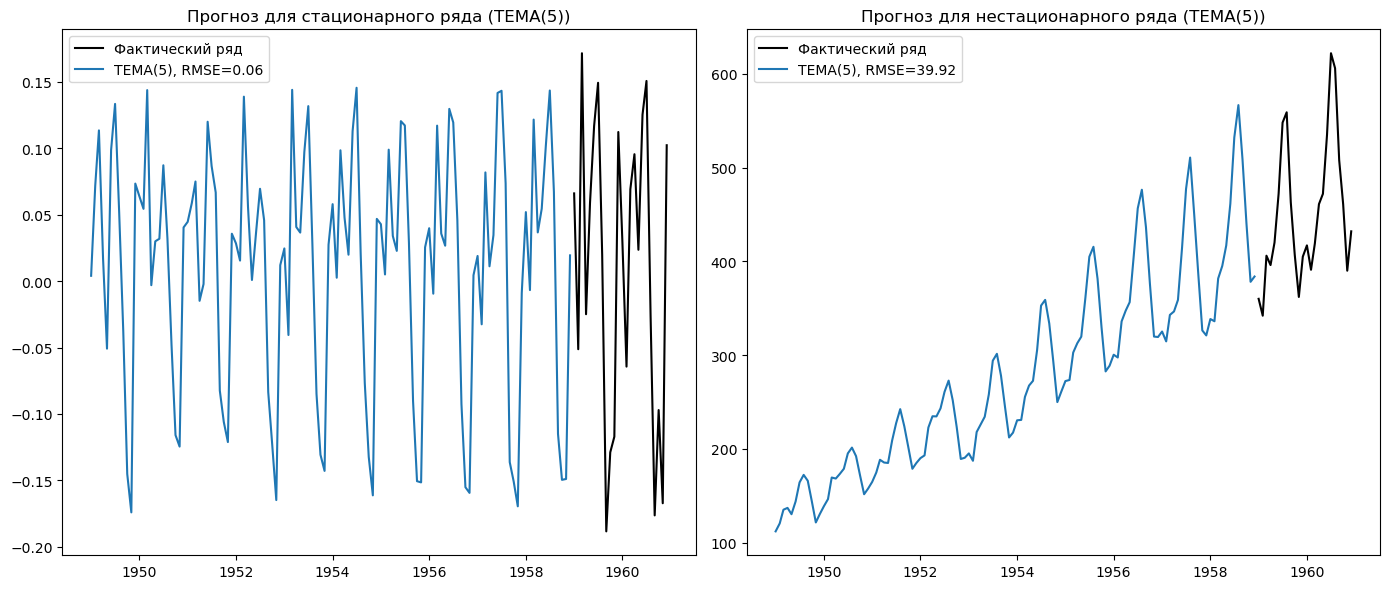

In [86]:
# Визуализация лучших моделей
fig, axes = plt.subplots(ncols=2, figsize=(14, 6))

# Стационарный ряд
axes[0].plot(stationary[-24:], color='black', label="Фактический ряд")
if best_model_stationary['prediction'] is not None:
    axes[0].plot(best_model_stationary['prediction'], label=f"{best_model_stationary['model']}, RMSE={best_model_stationary['rmse']:.2f}")
axes[0].set_title(f"Прогноз для стационарного ряда ({best_model_stationary['model']})")
axes[0].legend()

# Нестационарный ряд
axes[1].plot(non_stationary[-24:], color='black', label="Фактический ряд")
if best_model_non_stationary['prediction'] is not None:
    axes[1].plot(best_model_non_stationary['prediction'], label=f"{best_model_non_stationary['model']}, RMSE={best_model_non_stationary['rmse']:.2f}")
axes[1].set_title(f"Прогноз для нестационарного ряда ({best_model_non_stationary['model']})")
axes[1].legend()

plt.tight_layout()
plt.show()